Digit Recoginition 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
# Lin Reg
from sklearn.linear_model import LinearRegression
# Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Support Vector Machine
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Log Reg
from sklearn.linear_model import LogisticRegression
# GridSearchCV for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


EDA

In [5]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Data Cleaning and Preprocessing

In [7]:
def plotConfusionMatrix(y, ypred):
    CM = confusion_matrix(y, ypred)
    plt.figure(figsize=(15,15))
    sns.heatmap(CM, annot=True)
    plt.show()


In [8]:
X = train.drop('label', axis = 1)

pca = PCA(n_components=100).fit(X)
pcaXTrain = pca.transform(X)
pcaXTest = pca.transform(test)


In [9]:
pcaYTrain = train['label']
print(pcaXTrain.shape, pcaYTrain.shape)
print(pcaXTest.shape)


(42000, 100) (42000,)
(28000, 100)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(pcaXTrain, pcaYTrain, test_size = 0.2)
print("Train: ", X_train.shape, Y_train.shape)
print("Test: ", X_test.shape, Y_test.shape)


Train:  (33600, 100) (33600,)
Test:  (8400, 100) (8400,)


In [11]:
params = {'kernel': ['poly'], 'degree' : [2, 3, 4, 5]}
svm = SVC()
svmCV = GridSearchCV(svm, params, cv=2)
svmCV.fit(X_train, Y_train)


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'degree': [2, 3, 4, 5], 'kernel': ['poly']})

In [12]:
print("Best params",svmCV.best_params_)
print("Accuracy :",svmCV.best_score_)
optiparams = svmCV.best_params_


Best params {'degree': 3, 'kernel': 'poly'}
Accuracy : 0.9740178571428572


In [13]:
svm = SVC(kernel = optiparams['kernel'], degree = optiparams['degree'])
svm.fit(X_train, Y_train)
acc = svm.score(X_test, Y_test)
print(acc)

0.9814285714285714


Train -> Test data 

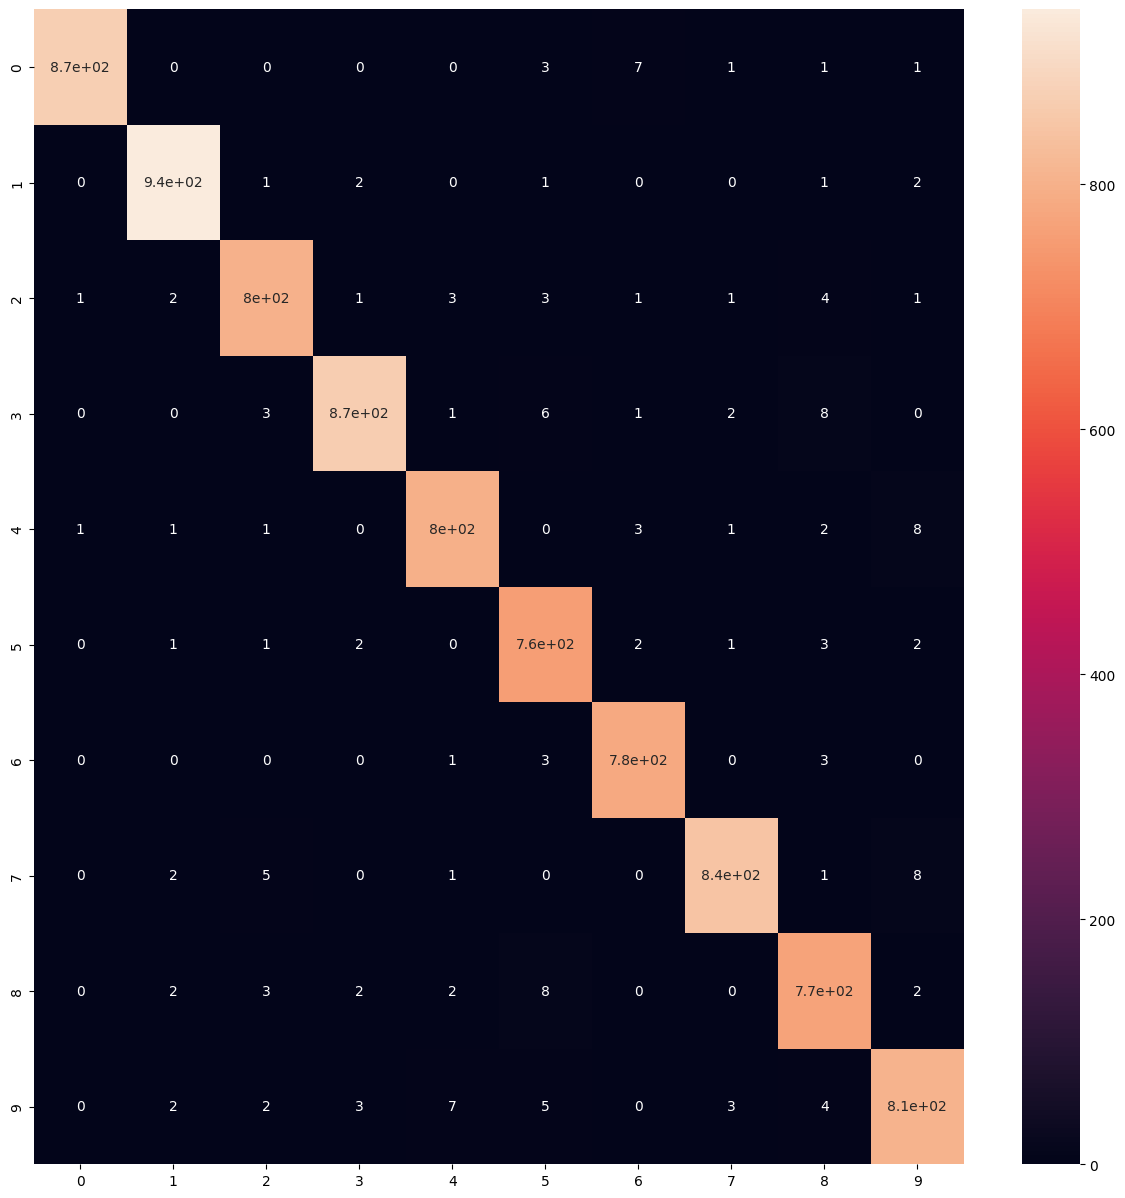

In [14]:
yhat = svm.predict(X_test)
plotConfusionMatrix(Y_test, yhat)

In [15]:
NN = Sequential()
NN.add(Dense (10, activation = 'sigmoid'))
NN.add(Dense (10, activation = 'sigmoid'))
NN.add(Dense (1, activation = 'relu'))
NN.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
NN.fit(X_train, Y_train, epochs = 150, batch_size=300)
acc = NN.evaluate(X_test, Y_test)
print(acc)

Epoch 1/150
112/112 [==============================] - 1s 2ms/step - loss: 21.8679 - accuracy: 0.0974
Epoch 2/150
112/112 [==============================] - 0s 2ms/step - loss: 1.4457 - accuracy: 0.1062
Epoch 3/150
112/112 [==============================] - 0s 2ms/step - loss: -2.5503 - accuracy: 0.0978
Epoch 4/150
112/112 [==============================] - 0s 2ms/step - loss: -35.2263 - accuracy: 0.1090
Epoch 5/150
112/112 [==============================] - 0s 2ms/step - loss: -49.6722 - accuracy: 0.1111
Epoch 6/150
112/112 [==============================] - 0s 2ms/step - loss: -52.2535 - accuracy: 0.1111
Epoch 7/150
112/112 [==============================] - 0s 2ms/step - loss: -52.5095 - accuracy: 0.1111
Epoch 8/150
112/112 [==============================] - 0s 2ms/step - loss: -52.6556 - accuracy: 0.1111
Epoch 9/150
112/112 [==============================] - 0s 2ms/step - loss: -52.7728 - accuracy: 0.1111
Epoch 10/150
112/112 [==============================] - 0s 2ms/step - loss: -

Actual Test Data

In [42]:
res = svm.predict(pcaXTest)
res

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)